<a href="https://colab.research.google.com/github/wahid-hawk/web-scraping/blob/web-scraping/Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [ ]:
# Install necessary libraries
!pip install requests
!pip install beautifulsoup4

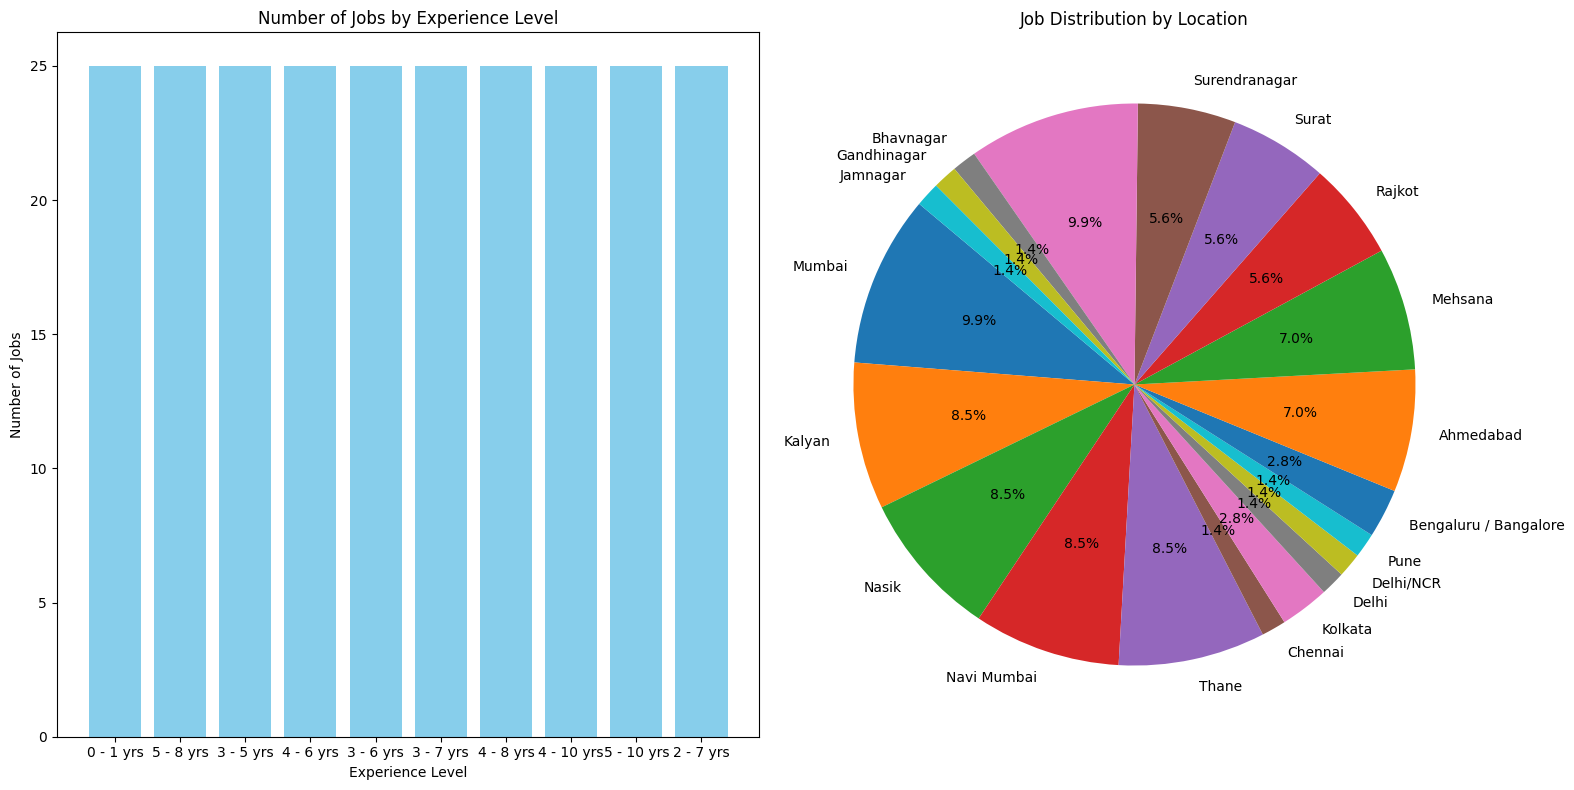

Job Title: Data
Company Name: Maxgen Technologies
Location: Mumbai,  Kalyan,  Nasik,  Navi Mumbai,  Thane
Experience: 0 - 1 yrs
Salary: Not specified
---
Job Title: Data
Company Name: HyreFox Consultants
Location: Chennai
Experience: 5 - 8 yrs
Salary: Not specified
---
Job Title: Data
Company Name: tcg digital solutions pvt ltd
Location: Kolkata
Experience: 3 - 5 yrs
Salary: Not specified
---
Job Title: Data
Company Name: innefu labs pvt. ltd.
Location: Delhi,  Delhi/NCR
Experience: 4 - 6 yrs
Salary: Not specified
---
Job Title: Data
Company Name: bprise pvt ltd
Location: Mumbai
Experience: 3 - 6 yrs
Salary: Not specified
---
Job Title: Data
Company Name: Nihilent Technologies Pvt. Ltd.
Location: Pune,  Kolkata
Experience: 3 - 7 yrs
Salary: Not specified
---
Job Title: Data
Company Name: INSPIRATION MANPOWER
Location: Bengaluru / Bangalore
Experience: 4 - 8 yrs
Salary: Not specified
---
Job Title: Data
Company Name: INSPIRATION MANPOWER
Location: Bengaluru / Bangalore
Experience: 4 - 1

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Function to scrape job data
def scrape_job_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        job_containers = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        job_data = []
        for job_container in job_containers:
            job_title_raw = job_container.find('strong', class_='blkclor').text.strip()
            additional_info_element = job_container.find('span', class_='job-add')
            additional_info = additional_info_element.text.strip() if additional_info_element else ''
            job_title = f"{job_title_raw} {additional_info}".strip()

            company_name_raw = job_container.find('h3', class_='joblist-comp-name').text.strip()
            company_name = company_name_raw.replace('(More Jobs)', '').strip()

            experience = job_container.find('ul', class_='top-jd-dtl clearfix').find('li').text.strip().replace('card_travel', '')

            location_container = job_container.find('ul', class_='top-jd-dtl clearfix').find_all('li')[1]
            location_items = location_container.find_all('span')
            location = ', '.join(item['title'] for item in location_items)

            salary_container = job_container.find('ul', class_='top-jd-dtl clearfix').find_all('li', class_='salary')
            salary = salary_container[0].text.strip() if salary_container else 'Not specified'

            job_data.append({
                'Job Title': job_title,
                'Company Name': company_name,
                'Location': location,
                'Experience': experience,
                'Salary': salary
            })

        return job_data
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None
# Function to visualize job data with bar and pie charts
def visualize_job_data(job_data):
    # Bar chart for number of jobs by experience level
    experience_levels = [job['Experience'] for job in job_data]
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.bar(experience_levels, len(experience_levels), color='skyblue')
    plt.title('Number of Jobs by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Number of Jobs')

    # Pie chart for job distribution by location
    location_counts = {}
    for job in job_data:
        locations = [loc.strip() for loc in job['Location'].split(',')]
        for location in locations:
            location_counts[location] = location_counts.get(location, 0) + 1

    plt.subplot(1, 2, 2)
    plt.pie(location_counts.values(), labels=location_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Job Distribution by Location')

    # Show the plots
    plt.tight_layout()
    plt.show()

visualize_job_data(job_data)
# URL of the TimesJobs job search results page
url = 'https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=%22Data+Science%22&txtLocation='

# Scrape job data
job_data = scrape_job_data(url)

# Print the extracted job data
if job_data:
    for job in job_data:
        print(f"Job Title: {job['Job Title']}")
        print(f"Company Name: {job['Company Name']}")
        print(f"Location: {job['Location']}")
        print(f"Experience: {job['Experience']}")
        print(f"Salary: {job['Salary']}")
        print("---")

else:
    print("No job data available.")